## Keras를 이용한 딥러닝 손글씨 인식

### 학습내용
- MNIST 데이터 셋을 활용하여 간단한 딥러닝을 구현해본다.

### 라이브러리 불러오기
- Tensorflow
- Keras
- Pytorch

### 환경
- google colab
- tensorflow 2.8.0
- keras 2.8.0
- python 3.7.13


## 01. 라이브러리 임포트

In [4]:
import tensorflow as tf
import keras
import sys

import numpy as np
import matplotlib

In [3]:
print(tf.__version__)
print(keras.__version__)
print(sys.version)

2.9.2
2.9.0
3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


## 02. 케라스(Keras) 이해
### 케라스(Keras) 의미 이해
- ONEIROS(Open-ended Neuro-Electronic Intelligent Robot Operating System) 프로젝트 일부
- 오네이로스의 의미는 꿈을 의인화 시킨 신이다.

### 케라스(Keras) 주요 특징
- 개발 및 유지보수 : 프랑소와 쏠레(Francois Chollet)
- 모듈화(Modularity) : 모듈은 독립적이고 최소한의 제약사항으로 연결
- 최소주의(Minimalism) : 각 모듈은 짧고 간결하다
- 쉬운 확장성 : 새로운 클래스나 함수로 모듈을 아주 쉽게 추가
- 파이썬 기반 : 파이썬 코드로 모델들이 정의

### 케라스(Keras) 딥러닝 모델 만들기 절차 이해
가. 데이터 셋 생성 및 데이터 형태 맞추기.
- 데이터 준비(훈련셋, 검증셋, 시험셋 등)
- 딥러닝 모델의 학습 및 평가를 위한 데이터 형태 맞추기(포맷 변환)

나. 모델 만들기
- 모델(Sequential)을 생성 후 레이어를 추가하여 구성
- 복잡한 모델 구성 시 Keras API를 사용

다. 모델 학습과정 설정하기
- 학습에 대한 설정 compile()
- 학습에 대한 설정, 손실 함수 및 최적화 방법 정의

라. 모델 학습
- 모델을 훈련셋(train)으로 학습
- fit() 함수

마. 학습과정 살펴보기
- 훈련셋, 검증셋의 손실 및 정확도 측정

바. 모델 평가
- evaluate()
- 준비된 시험셋으로 학습 모델 평가

사. 모델 사용하기
- predict()


In [5]:
# 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [6]:
# 데이터셋 생성하기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
import matplotlib.pyplot as plt

## 03. 손글씨 데이터 시각화
- X_train : 손글씨 그림으 픽셀 정보(28*28) 총 784개의 픽셀 정보
- y_train : 손글씨 그림의 숫자(0~9) 정보

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


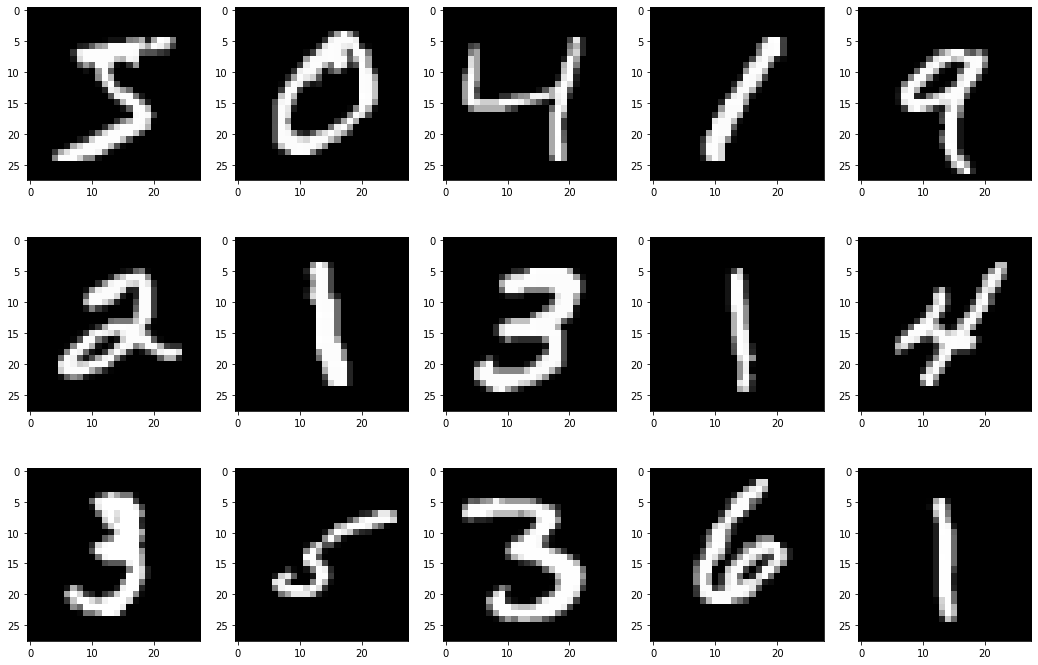

In [11]:
figure,axes = plt.subplots(nrows=3, ncols=5)     # 3행 5열의 구조
figure.set_size_inches(18,12)                    # 전체 크기


plt.gray()
print("label={}".format(y_train[0:15]))          # x 데이터 0~14개 가져오기


col=0
for row in range(0,3):
  col = row*5
  axes[row][0].imshow(X_train[col])              # 0, 5, 10의 값을 갖는 위치 값 이미지 표시
  axes[row][1].imshow(X_train[col+1])            # 1, 6, 11의 값을 갖는 위치 값 이미지 표시
  axes[row][2].imshow(X_train[col+2])            # 2, 7, 12의 값을 갖는 위치 값 이미지 표시
  axes[row][3].imshow(X_train[col+3])            # 3, 8, 13의 값을 갖는 위치 값 이미지 표시
  axes[row][4].imshow(X_train[col+4])            # 4, 9, 14의 값을 갖는 위치 값 이미지 표시

label=[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


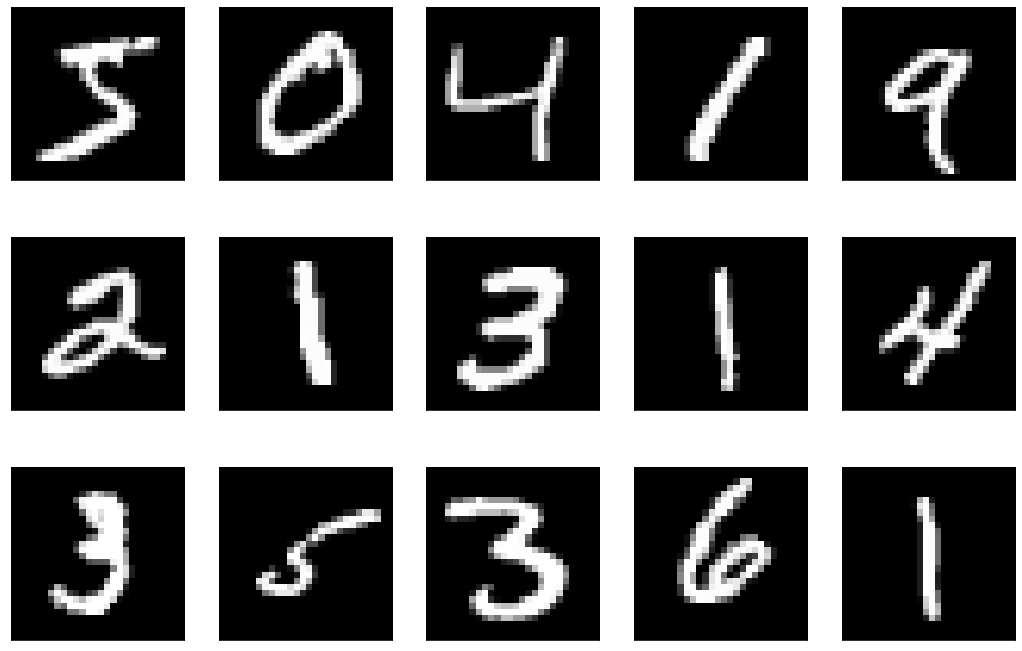

In [13]:
# 조금 더 간단한 시각화
fig, axes = plt.subplots(3, 5, figsize=(18,12),
                         subplot_kw = {'xticks':(), 'yticks':()})

print("label={}".format(y_train[0:15]))             # X 데이터 0~14개 가져오기

for image, ax in zip(X_train, axes.ravel() ):
  ax.imshow(image)                                  # 이미지 표시

In [14]:
# 데이터 처리
# 입력 데이터 : X_train, X_test (60000, 28, 28) -> (60000, 784)
# 레이블 데이터 : y_train, y_test 숫자 0~9를 2진 벡터형태로 변경 (0 0 0 0 1 0 0 0 0 0)

In [15]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

## 04. 모델 구축 및 학습, 평가
첫 번째 add
- Dense() : 층의 세부 내용 지정
- input_dim : 입력층의 뉴런 개수, units : 입력층 이후의 은닉층의 뉴런 개수
- activation : 활성화함수 지정

두 번째 add, 마지막 층 추가
- units = 10 : 손글씨의 예측 값이 0~9 사이의 값이므로 10개
- 일반적으로 마지막 층(출력층)이 범주형 여러개 예측일 경우 softmax 함수를 사용

In [16]:
# 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax' ))

모델의 세부 설정
- 비용함수(loss) : categorical_crossentropy (범주형 다항분류의 경우)
- 최적화함수(optimizer) : SGD(Stochastic Gradient Descent) 알고리즘 이용
- 최종평가(metrics) : 정확도로 측정(손글씨 정답을 맞추는지 아닌지)

In [17]:
# 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])

모델 학습시키기

In [19]:
# 모델 학습시키기
# validation_data : 모델을 학습할 때는 기본 데이터를 이용하고, 평가 시 사용할 데이터를 지정.
hist = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 6.3860 - accuracy: 0.2276 - val_loss: 2.2729 - val_accuracy: 0.1223
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1903 - accuracy: 0.1722 - val_loss: 2.1920 - val_accuracy: 0.1815
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.1678 - accuracy: 0.1889 - val_loss: 2.0397 - val_accuracy: 0.2122
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 2.1330 - accuracy: 0.2137 - val_loss: 2.2471 - val_accuracy: 0.1984
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1350 - accuracy: 0.2068 - val_loss: 2.0246 - val_accuracy: 0.2275
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9713 - accuracy: 0.2903 - val_loss: 1.9619 - val_accuracy: 0.2558
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 2.0132 - accuracy: 0.2822 - val_loss: 1.8921 - val_accuracy:

학습을 통해 얻어진 값 살펴보기
- epoch 10번 이미로 값이 각각 10개 씩

In [21]:
# 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])            # 'val_loss' : 평가셋 손실값
print(hist.history['accuracy'])        # 'val_acc' : 평가셋 정확도

## training loss and acc ##
[6.386043071746826, 2.1902904510498047, 2.1678311824798584, 2.133026599884033, 2.1350200176239014, 1.9713153839111328, 2.0131919384002686, 1.9172227382659912, 2.0393993854522705, 2.0437560081481934]
[0.22759999334812164, 0.1721833348274231, 0.18885000050067902, 0.21369999647140503, 0.20679999887943268, 0.2902500033378601, 0.28216665983200073, 0.2999333441257477, 0.268533319234848, 0.2608333230018616]


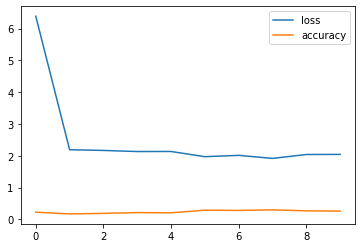

In [22]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['accuracy'], label='accuracy')
plt.legend()

모델 평가하기
- 테스트 데이터 셋(X_test, y_test)을 이용
- 첫번째 값이 loss 손실값
- 두번째 값이 정확도

In [23]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

313/313 [==============================] - 1s 4ms/step - loss: 1.9654 - accuracy: 0.3157
## evaluation loss and metrics ##
[1.965428352355957, 0.3156999945640564]


## 실습과제
- 가. 픽셀값을 0~255를 0~1 사이로 변경해보기
- 나. epoch=10 -> 20 으로 변경해보기. 어떤 현상이 발생되는가
- 다. batch_size = 32 -> 16 변경해보기.

### 참고 동영상
- https://www.youtube.com/watch?v=aircAruvnKk